## End to end Deep Learning Project Using Simple RNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense, LSTM

In [2]:
## Load the imdb dataset

max_features=10000 ##vocabulary size
maxlen = 500 ## max number of words in a review
batch_size = 32

(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

# Print the shape of the data
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_train.shape}, Testing labels shape: {y_test.shape}')

Training data shape: (25000,), Training labels shape: (25000,)
Testing data shape: (25000,), Testing labels shape: (25000,)


In [3]:
X_train[0],y_train[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [4]:
## Inspect a sample review and its label
sample_review=X_train[0]
sample_label=y_train[0]

print(f"Sample review (as integers):{sample_review}")
print(f'Sample label: {sample_label}')


Sample review (as integers):[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample label: 1


In [5]:
### MApping of words index bacl to words(for understanding)
word_index=imdb.get_word_index()
#word_index
reverse_word_index = {value: key for key, value in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [6]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
from tensorflow.keras.preprocessing import sequence
# Pad sequences
X_train=sequence.pad_sequences(X_train,maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
X_train

X_train shape: (25000, 500), X_test shape: (25000, 500)


array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [8]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),  # Adjust dimensions
    SimpleRNN(64, return_sequences=True), 
    Dropout(0.5),  # Add dropout for regularization
    SimpleRNN(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\yogit\OneDrive\Desktop\DeepLearning\RNN\SimpleRNN\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
## Create an instance of EarlyStoppping Callback
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
earlystopping

In [13]:
## Train the model with early sstopping
history=model.fit(   X_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_split=0.2,
                  callbacks=[earlystopping]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 282ms/step - accuracy: 0.5029 - loss: 0.7067 - val_accuracy: 0.4936 - val_loss: 0.7086
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 268ms/step - accuracy: 0.5074 - loss: 0.7003 - val_accuracy: 0.6050 - val_loss: 0.6511
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 227ms/step - accuracy: 0.6789 - loss: 0.5933 - val_accuracy: 0.7042 - val_loss: 0.5685
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 164ms/step - accuracy: 0.8001 - loss: 0.4503 - val_accuracy: 0.8014 - val_loss: 0.4586
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 207ms/step - accuracy: 0.8335 - loss: 0.3825 - val_accuracy: 0.6352 - val_loss: 0.6350
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.7953 - loss: 0.4400 - val_accuracy: 0.7378 - val_loss: 0.5611
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 282ms/step - accuracy: 0.8463 - loss: 0.3635 - val_accuracy: 0.7056 - val_loss: 0.5625
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 242ms/step - accuracy: 0.8210 -

<Figure size 640x480 with 0 Axes>

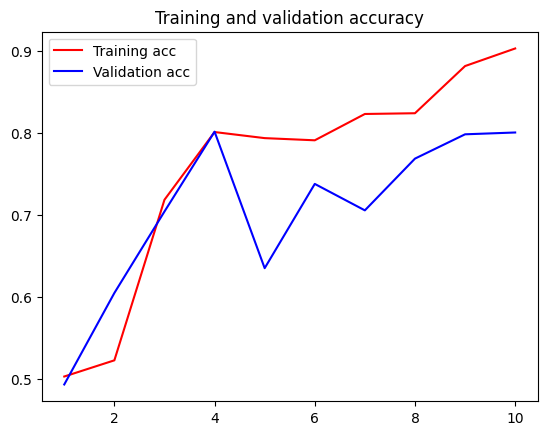

<Figure size 640x480 with 0 Axes>

In [14]:
# Ploting results
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()



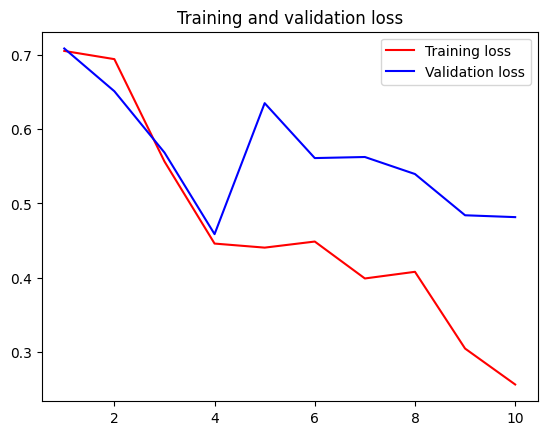

In [15]:
# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7978 - loss: 0.4605


[0.4582292437553406, 0.7988399863243103]

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (32, 500, 128)         │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (32, 500, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (32, 500, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,914,501 (14.93 MB)

 Trainable params: 1,304,833 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,609,668 (9.96 MB)

In [19]:
## Save model file
model.save('imdb_model_simplernn.h5')